In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')
df.dropna(inplace=True)


In [3]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values  



## Splitting & Using GB


In [4]:
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)


## Using Evaluation Metrics

Accuracy =  90.66666666666666 %
Precision =  0.9064039408866995
Recall =  0.9031674208144796
F1-score =  0.9046148255813954


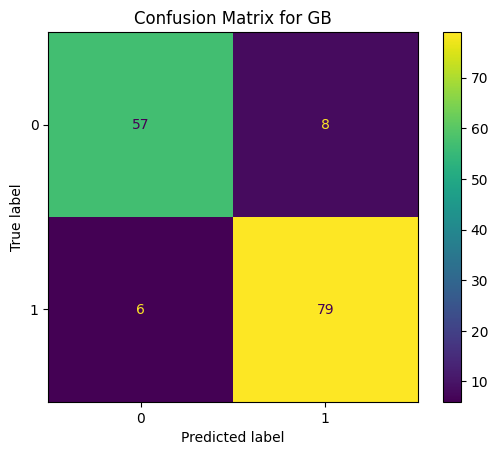

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        65
           1       0.91      0.93      0.92        85

    accuracy                           0.91       150
   macro avg       0.91      0.90      0.90       150
weighted avg       0.91      0.91      0.91       150



In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average macro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for GB')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


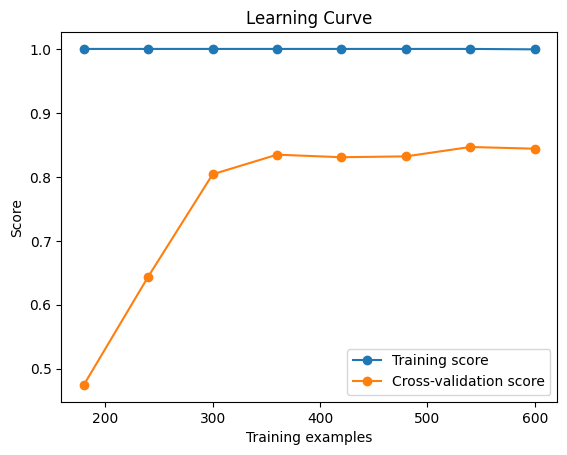

In [6]:
train_sizes, train_scores, test_scores = learning_curve(gradient_boosting, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


--- Model Training (Gradient Boosting) ---
Training Wall Time: 0.7313 seconds
Training CPU Time (User): 0.6875 seconds
Training CPU Time (System): 0.0156 seconds
Memory RSS after training: 205.90 MB

--- Model Prediction (Gradient Boosting) ---
Prediction Wall Time (for 150 samples): 0.0040 seconds
Prediction CPU Time (User): 0.0000 seconds
Prediction CPU Time (System): 0.0000 seconds

--- Model Evaluation (Gradient Boosting) ---
Accuracy = 90.00 %
Precision (Macro) = 0.8988
Recall (Macro) = 0.8973
F1-score (Macro) = 0.8980

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        65
           1       0.91      0.92      0.91        85

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150


--- Model Complexity (Gradient Boosting) ---
Number of Estimators (Boosting Stages): 100
Number of Features Seen: 70


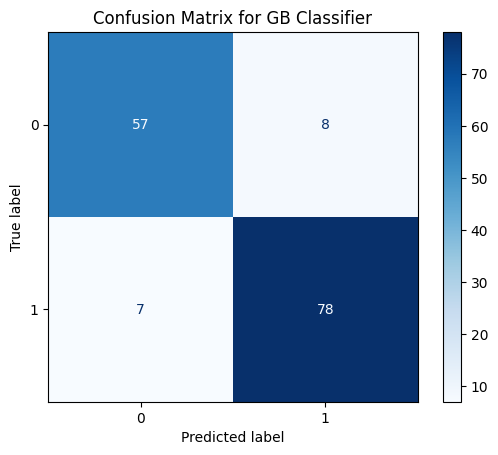


Displaying Learning Curve...


C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python311\Lib\site-packages\sklearn\ensemble\_gb.py", line 665, in fit
    y = self._encode_y(y=y, sample_weight=None)
        ^^^^^^^^^^^^^^^^^^^

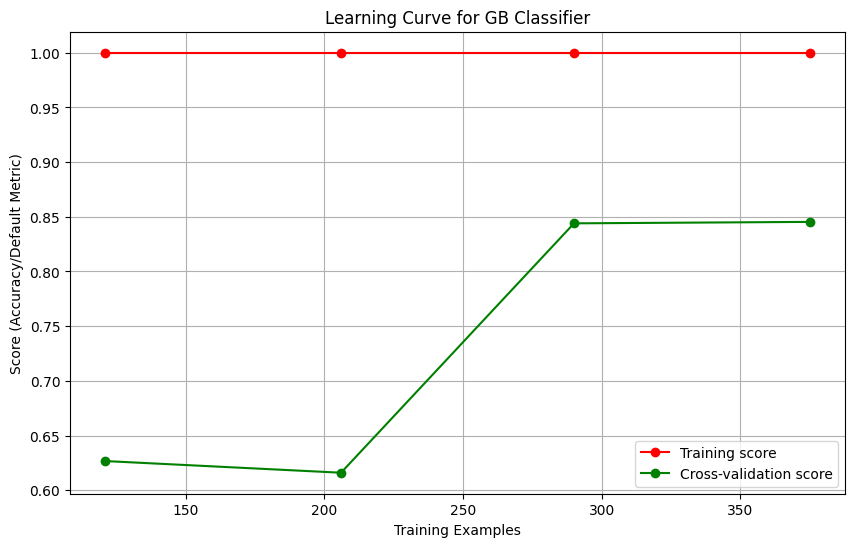


Displaying Feature Importances...


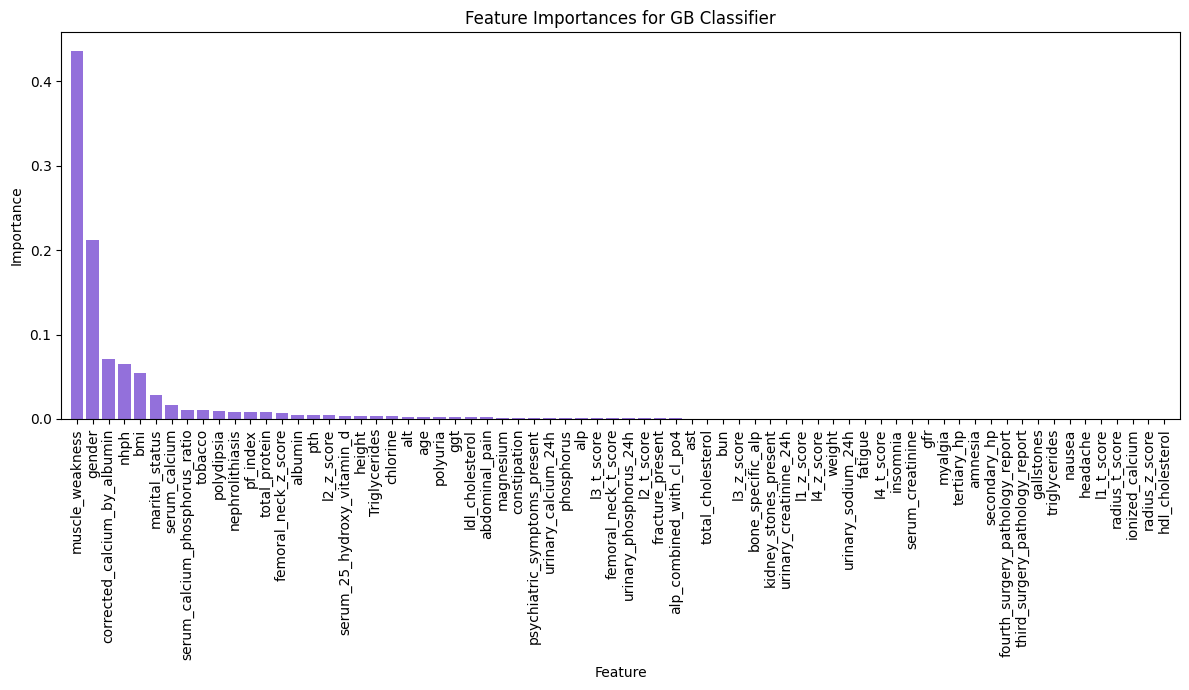


Displaying Histogram of Individual Tree Depths (GB)...


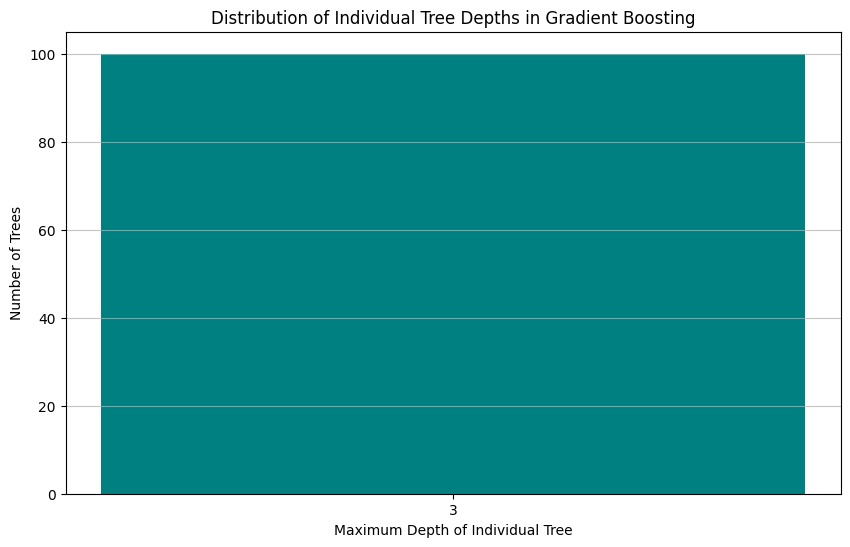


--- Generating Visualizations for Collected Metrics (Gradient Boosting) ---


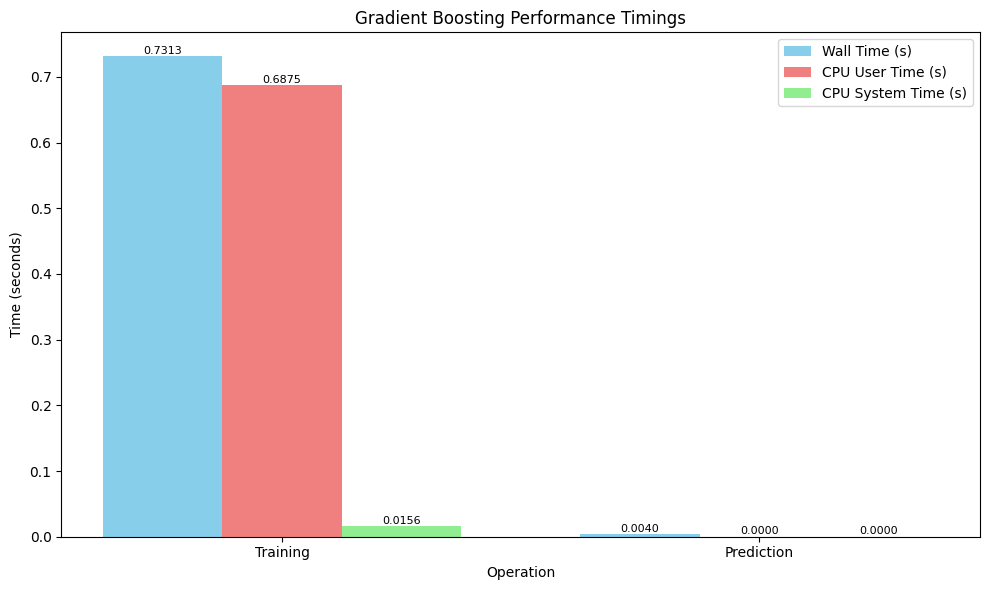

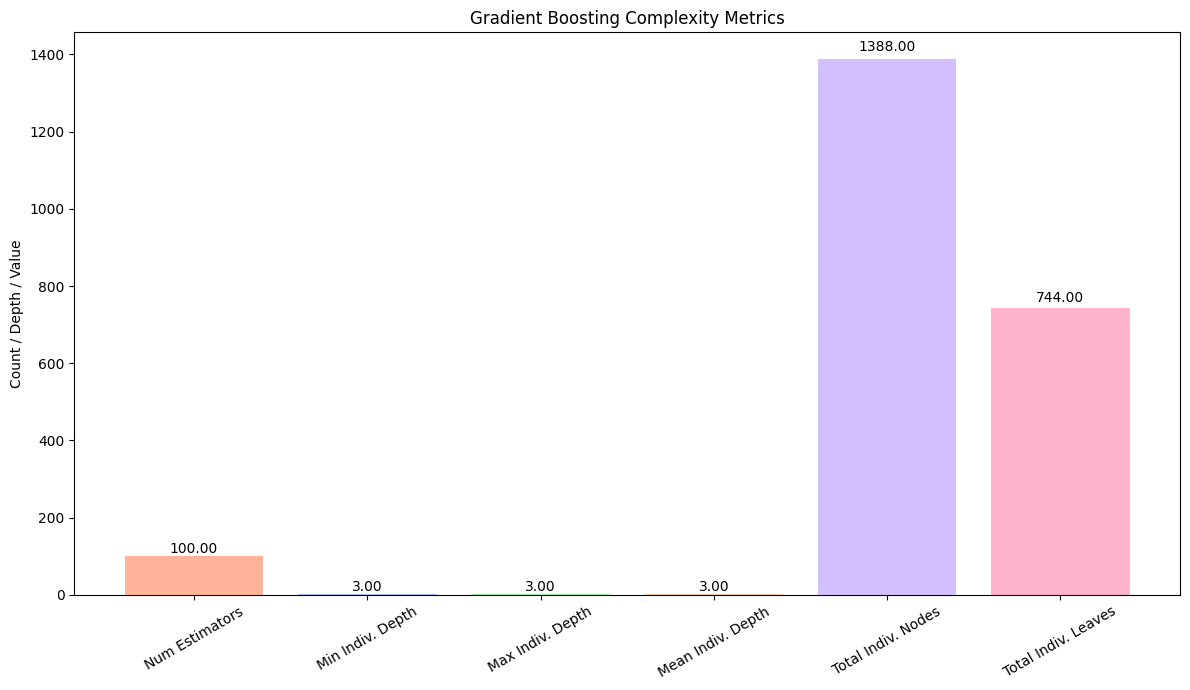

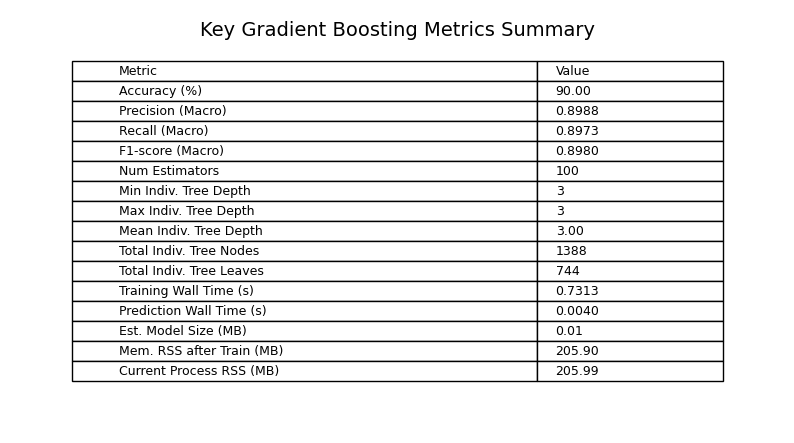


--- Analysis Complete ---


In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import warnings
import sys # For model object size

# Attempt to import psutil for CPU and memory stats
try:
    import psutil
    psutil_available = True
    process = psutil.Process() # Get current process
except ImportError:
    psutil_available = False
    print("psutil library not found. CPU and memory usage stats will not be available.")
    print("To install psutil, run: pip install psutil")

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
# DecisionTreeRegressor is used by GradientBoostingClassifier internally
from sklearn.tree import DecisionTreeRegressor

# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- 0. Initialize Metrics Storage ---
# Dictionary to store all metrics for later visualization
all_metrics = {}

# --- 1. Load Data ---
# !!! IMPORTANT: Make sure this path is correct for your system !!!
df = pd.read_csv(r"C:\Users\musab\desktop\ht\htOld\dataset\hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')


df.dropna(inplace=True)

if df.empty:
    print("DataFrame is empty after dropping NaNs. Exiting.")
    sys.exit()

# Assuming the first column is the target and the rest are features
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Convert feature names to strings, handle potential non-string column names
feature_names = [str(col) for col in df.columns[1:]]
# Convert class names from y to strings (used for confusion matrix display_labels)
class_names = [str(cls) for cls in np.unique(y)]


# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Initialize Model ---
# Using GradientBoostingClassifier as requested
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# --- 4. Train Model and Measure Resources ---
print("\n--- Model Training (Gradient Boosting) ---")
training_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_train = process.cpu_times()
    mem_info_before_train = process.memory_info().rss

gradient_boosting.fit(X_train, y_train)

training_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_train = process.cpu_times()
    mem_info_after_train = process.memory_info().rss

all_metrics['training_wall_time'] = training_end_time_wall - training_start_time_wall
print(f"Training Wall Time: {all_metrics['training_wall_time']:.4f} seconds")

if psutil_available:
    all_metrics['training_cpu_time_user'] = cpu_times_after_train.user - cpu_times_before_train.user
    all_metrics['training_cpu_time_system'] = cpu_times_after_train.system - cpu_times_before_train.system
    all_metrics['memory_rss_after_training_mb'] = mem_info_after_train / (1024**2)
    print(f"Training CPU Time (User): {all_metrics['training_cpu_time_user']:.4f} seconds")
    print(f"Training CPU Time (System): {all_metrics['training_cpu_time_system']:.4f} seconds")
    print(f"Memory RSS after training: {all_metrics['memory_rss_after_training_mb']:.2f} MB")
else: # Default values if psutil not available
    all_metrics['training_cpu_time_user'] = 0
    all_metrics['training_cpu_time_system'] = 0
    all_metrics['memory_rss_after_training_mb'] = 0


# --- 5. Make Predictions and Measure Resources ---
print("\n--- Model Prediction (Gradient Boosting) ---")
prediction_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_predict = process.cpu_times()

y_pred = gradient_boosting.predict(X_test)

prediction_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_predict = process.cpu_times()

all_metrics['prediction_wall_time'] = prediction_end_time_wall - prediction_start_time_wall
print(f"Prediction Wall Time (for {len(X_test)} samples): {all_metrics['prediction_wall_time']:.4f} seconds")

if psutil_available:
    all_metrics['prediction_cpu_time_user'] = cpu_times_after_predict.user - cpu_times_before_predict.user
    all_metrics['prediction_cpu_time_system'] = cpu_times_after_predict.system - cpu_times_before_predict.system
    print(f"Prediction CPU Time (User): {all_metrics['prediction_cpu_time_user']:.4f} seconds")
    print(f"Prediction CPU Time (System): {all_metrics['prediction_cpu_time_system']:.4f} seconds")
else: # Default values
    all_metrics['prediction_cpu_time_user'] = 0
    all_metrics['prediction_cpu_time_system'] = 0

# --- 6. Evaluate Model ---
print("\n--- Model Evaluation (Gradient Boosting) ---")
all_metrics['accuracy'] = accuracy_score(y_test, y_pred) * 100
all_metrics['precision_macro'] = precision_score(y_test, y_pred, average='macro', zero_division=0)
all_metrics['recall_macro'] = recall_score(y_test, y_pred, average='macro', zero_division=0)
all_metrics['f1_score_macro'] = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Accuracy = {all_metrics['accuracy']:.2f} %")
print(f"Precision (Macro) = {all_metrics['precision_macro']:.4f}")
print(f"Recall (Macro) = {all_metrics['recall_macro']:.4f}")
print(f"F1-score (Macro) = {all_metrics['f1_score_macro']:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# --- 7. Model Complexity Statistics ---
print("\n--- Model Complexity (Gradient Boosting) ---")
all_metrics['n_estimators'] = gradient_boosting.n_estimators_ # Actual number of estimators used
all_metrics['n_features'] = gradient_boosting.n_features_in_
if hasattr(gradient_boosting, 'max_features_'): # max_features_ might not exist depending on version/params
    all_metrics['max_features_inferred'] = gradient_boosting.max_features_
else:
    all_metrics['max_features_inferred'] = 'N/A'


print(f"Number of Estimators (Boosting Stages): {all_metrics['n_estimators']}")
print(f"Number of Features Seen: {all_metrics['n_features']}")
print(f"Inferred Max Features: {all_metrics['max_features_inferred']}")


# Analyze individual trees (DecisionTreeRegressor instances)
if hasattr(gradient_boosting, 'estimators_') and gradient_boosting.estimators_ is not None and len(gradient_boosting.estimators_) > 0:
    # For binary classification, estimators_ is a 1D array of trees (n_estimators,).
    # For multi-class, it's (n_estimators, n_classes). We'll assume binary or take the first class for multi-class stats.
    actual_estimators = gradient_boosting.estimators_
    if actual_estimators.ndim == 2: # Multi-class, take trees for the first class for stats
        print(f"Note: Multi-class GB. Tree stats are for the first class (class 0) estimators.")
        base_trees = [est.tree_ for est in actual_estimators[:, 0] if hasattr(est, 'tree_')]
    else: # Binary classification or regression
        base_trees = [est.tree_ for est in actual_estimators if hasattr(est, 'tree_')]

    if base_trees:
        tree_depths = [tree.max_depth for tree in base_trees]
        tree_node_counts = [tree.node_count for tree in base_trees]
        tree_leaf_counts = [tree.n_leaves for tree in base_trees]

        all_metrics['min_ind_tree_depth'] = np.min(tree_depths)
        all_metrics['max_ind_tree_depth'] = np.max(tree_depths)
        all_metrics['mean_ind_tree_depth'] = np.mean(tree_depths)
        all_metrics['total_ind_tree_nodes'] = np.sum(tree_node_counts)
        all_metrics['mean_ind_nodes_per_tree'] = np.mean(tree_node_counts)
        all_metrics['total_ind_tree_leaves'] = np.sum(tree_leaf_counts)
        all_metrics['mean_ind_leaves_per_tree'] = np.mean(tree_leaf_counts)

        print(f"Min Individual Tree Depth: {all_metrics['min_ind_tree_depth']}")
        print(f"Max Individual Tree Depth: {all_metrics['max_ind_tree_depth']}")
        print(f"Mean Individual Tree Depth: {all_metrics['mean_ind_tree_depth']:.2f}")
        print(f"Total Nodes across all Individual Trees: {all_metrics['total_ind_tree_nodes']}")
        print(f"Mean Nodes per Individual Tree: {all_metrics['mean_ind_nodes_per_tree']:.2f}")
        print(f"Total Leaves across all Individual Trees: {all_metrics['total_ind_tree_leaves']}")
        print(f"Mean Leaves per Individual Tree: {all_metrics['mean_ind_leaves_per_tree']:.2f}")
    else:
        print("No valid tree objects found in estimators.")
        keys_to_default_tree_stats = ['min_ind_tree_depth', 'max_ind_tree_depth', 'mean_ind_tree_depth',
                                      'total_ind_tree_nodes', 'mean_ind_nodes_per_tree',
                                      'total_ind_tree_leaves', 'mean_ind_leaves_per_tree']
        for key in keys_to_default_tree_stats: all_metrics[key] = 0
else:
    print("Estimators attribute not available or empty. Cannot calculate detailed individual tree stats.")
    keys_to_default_tree_stats = ['min_ind_tree_depth', 'max_ind_tree_depth', 'mean_ind_tree_depth',
                                  'total_ind_tree_nodes', 'mean_ind_nodes_per_tree',
                                  'total_ind_tree_leaves', 'mean_ind_leaves_per_tree']
    for key in keys_to_default_tree_stats: all_metrics[key] = 0


# Estimating model size
model_size_bytes = sys.getsizeof(gradient_boosting)
if hasattr(gradient_boosting, 'estimators_') and gradient_boosting.estimators_ is not None:
    model_size_bytes += sys.getsizeof(gradient_boosting.estimators_)
    for est_array_or_tree in gradient_boosting.estimators_: # est can be an array (multi-class) or single tree
        if isinstance(est_array_or_tree, np.ndarray): # Multi-class case
            for est in est_array_or_tree:
                if hasattr(est, 'tree_') and est.tree_: model_size_bytes += sys.getsizeof(est.tree_)
        elif hasattr(est_array_or_tree, 'tree_') and est_array_or_tree.tree_: # Binary case
             model_size_bytes += sys.getsizeof(est_array_or_tree.tree_)


all_metrics['estimated_model_size_kb'] = model_size_bytes / 1024
all_metrics['estimated_model_size_mb'] = model_size_bytes / (1024**2)
print(f"Estimated Model Object Size in Memory: {all_metrics['estimated_model_size_kb']:.2f} KB ({all_metrics['estimated_model_size_mb']:.2f} MB)")

if psutil_available:
    all_metrics['current_process_rss_mb'] = process.memory_info().rss / (1024**2)
    all_metrics['current_process_vms_mb'] = process.memory_info().vms / (1024**2)
    print(f"Current Process RSS Memory: {all_metrics['current_process_rss_mb']:.2f} MB")
    print(f"Current Process VMS Memory: {all_metrics['current_process_vms_mb']:.2f} MB")
else:
    all_metrics['current_process_rss_mb'] = 0
    all_metrics['current_process_vms_mb'] = 0

# --- 8. Visualizations (From User's GB Script and Adapted) ---

# Confusion Matrix
print("\nDisplaying Confusion Matrix...")
try:
    if len(y_test) > 0 and len(y_pred) > 0:
        unique_labels_train = np.unique(y_train)
        unique_labels_test = np.unique(y_test)
        all_unique_labels = np.unique(np.concatenate((unique_labels_train, unique_labels_test, np.unique(y_pred))))
        display_labels_cm = all_unique_labels if len(all_unique_labels) > 0 else class_names

        conf_matrix = confusion_matrix(y_test, y_pred, labels=display_labels_cm if len(display_labels_cm)>0 else None)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels_cm if len(display_labels_cm)>0 else ['N/A'])
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix for GB Classifier')
        plt.show()
    else:
        print("Skipping Confusion Matrix: y_test or y_pred is empty.")
except Exception as e:
    print(f"Could not plot Confusion Matrix: {e}")


# Learning Curve
print("\nDisplaying Learning Curve...")
try:
    if len(y) >= 5 : # cv=5
        n_splits_cv = min(5, len(np.unique(y)))
        if n_splits_cv < 2 :
            print(f"Skipping Learning Curve: Not enough unique classes in target variable for {n_splits_cv} splits (min 2 required).")
        else:
            train_sizes, train_scores, test_scores = learning_curve(
                gradient_boosting, X, y, cv=n_splits_cv,
                n_jobs=-1,
                train_sizes=np.linspace(0.1, 1.0, 5) # Reduced points for faster plotting
            )
            plt.figure(figsize=(10, 6))
            plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
            plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
            plt.xlabel("Training Examples")
            plt.ylabel("Score (Accuracy/Default Metric)")
            plt.title("Learning Curve for GB Classifier")
            plt.legend(loc="best")
            plt.grid(True)
            plt.show()
    else:
        print("Skipping Learning Curve: Not enough samples in X or y for cross-validation (min 5 samples required for cv=5).")
except Exception as e:
    print(f"Could not plot Learning Curve: {e}")


# Feature Importances for Gradient Boosting
print("\nDisplaying Feature Importances...")
if hasattr(gradient_boosting, 'feature_importances_'):
    importances = gradient_boosting.feature_importances_
    indices = np.argsort(importances)[::-1]
    all_metrics['feature_importances'] = importances

    plt.figure(figsize=(12, 7))
    plt.title("Feature Importances for GB Classifier")
    plt.bar(range(X.shape[1]), importances[indices], color="mediumpurple", align="center")
    if 'feature_names' in locals() and len(feature_names) == X.shape[1]:
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    else:
        plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.ylabel("Importance")
    plt.xlabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print("Feature importances not available for this classifier.")
    all_metrics['feature_importances'] = []

# Histogram of Individual Tree Depths (if available)
print("\nDisplaying Histogram of Individual Tree Depths (GB)...")
if 'tree_depths' in locals() and tree_depths and len(tree_depths) > 0:
    plt.figure(figsize=(10, 6))
    min_d, max_d = min(tree_depths), max(tree_depths)
    bins_hist = range(min_d, max_d + 2) if min_d != max_d else [min_d, min_d + 1]
    plt.hist(tree_depths, bins=bins_hist, align='left', rwidth=0.8, color='teal')
    plt.title('Distribution of Individual Tree Depths in Gradient Boosting')
    plt.xlabel('Maximum Depth of Individual Tree')
    plt.ylabel('Number of Trees')
    plt.xticks(range(min_d, max_d + 1) if min_d != max_d else [min_d])
    plt.grid(axis='y', alpha=0.75)
    plt.show()
elif all_metrics.get('min_ind_tree_depth') is not None: # Check if model was fit and depths were calculated
    print("Individual tree depths data available but list might be empty or not calculated.")
else:
    print("Skipping Histogram of Individual Tree Depths: No data available.")


# --- 9. New Visualizations for Collected Metrics (Adapted for Gradient Boosting) ---
print("\n--- Generating Visualizations for Collected Metrics (Gradient Boosting) ---")

# Plot 1: Performance Timings (Same as before)
fig_perf_gb, ax_perf_gb = plt.subplots(figsize=(10, 6))
# ... (rest of the performance timing plot code is identical to RF/DT, just change titles/vars if needed)
time_categories = ['Training', 'Prediction']
wall_times = [all_metrics.get('training_wall_time', 0), all_metrics.get('prediction_wall_time', 0)]
cpu_user_times = [all_metrics.get('training_cpu_time_user', 0), all_metrics.get('prediction_cpu_time_user', 0)]
cpu_system_times = [all_metrics.get('training_cpu_time_system', 0), all_metrics.get('prediction_cpu_time_system', 0)]

bar_width = 0.25
index = np.arange(len(time_categories))

bar1 = ax_perf_gb.bar(index - bar_width, wall_times, bar_width, label='Wall Time (s)', color='skyblue')
bar2 = ax_perf_gb.bar(index, cpu_user_times, bar_width, label='CPU User Time (s)', color='lightcoral')
bar3 = ax_perf_gb.bar(index + bar_width, cpu_system_times, bar_width, label='CPU System Time (s)', color='lightgreen')

ax_perf_gb.set_xlabel('Operation')
ax_perf_gb.set_ylabel('Time (seconds)')
ax_perf_gb.set_title('Gradient Boosting Performance Timings')
ax_perf_gb.set_xticks(index)
ax_perf_gb.set_xticklabels(time_categories)
ax_perf_gb.legend()
for bar_group in [bar1, bar2, bar3]: # Add value labels
    for bar in bar_group:
        yval = bar.get_height()
        # Adjust yval offset for text based on max value to avoid overlap
        offset_factor = 0.001 * (max(wall_times + cpu_user_times + cpu_system_times) if any(wall_times + cpu_user_times + cpu_system_times) else 1)
        ax_perf_gb.text(bar.get_x() + bar.get_width()/2.0, yval + offset_factor, f'{yval:.4f}', ha='center', va='bottom', fontsize=8)
fig_perf_gb.tight_layout()
plt.show()


# Plot 2: Model Complexity for Gradient Boosting
fig_comp_gb, ax_comp_gb = plt.subplots(figsize=(12, 7))
complexity_metrics_names_gb = [
    'Num Estimators', 'Min Indiv. Depth', 'Max Indiv. Depth',
    'Mean Indiv. Depth', 'Total Indiv. Nodes', 'Total Indiv. Leaves'
]
complexity_values_gb = [
    all_metrics.get('n_estimators', 0), all_metrics.get('min_ind_tree_depth', 0), all_metrics.get('max_ind_tree_depth', 0),
    all_metrics.get('mean_ind_tree_depth', 0), all_metrics.get('total_ind_tree_nodes', 0), all_metrics.get('total_ind_tree_leaves', 0)
]
colors_gb = ['#FFB399', '#ADC2FF', '#99FFB3', '#FFD699', '#D4BFFF', '#FFB3CC']

bars_comp_gb = ax_comp_gb.bar(complexity_metrics_names_gb, complexity_values_gb, color=colors_gb)
ax_comp_gb.set_ylabel('Count / Depth / Value')
ax_comp_gb.set_title('Gradient Boosting Complexity Metrics')
ax_comp_gb.tick_params(axis='x', rotation=30)
for bar in bars_comp_gb: # Add value labels
    yval = bar.get_height()
    ax_comp_gb.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01 * yval, f'{yval:.2f}', ha='center', va='bottom')
fig_comp_gb.tight_layout()
plt.show()


# Plot 3: Summary Table of Key Metrics for Gradient Boosting
fig_table_gb, ax_table_gb = plt.subplots(figsize=(10, 5.5)) # Adjusted size for more rows
ax_table_gb.axis('tight')
ax_table_gb.axis('off')

table_data_gb = [
    ["Metric", "Value"],
    ["Accuracy (%)", f"{all_metrics.get('accuracy', 0):.2f}"],
    ["Precision (Macro)", f"{all_metrics.get('precision_macro', 0):.4f}"],
    ["Recall (Macro)", f"{all_metrics.get('recall_macro', 0):.4f}"],
    ["F1-score (Macro)", f"{all_metrics.get('f1_score_macro', 0):.4f}"],
    ["Num Estimators", f"{all_metrics.get('n_estimators', 0)}"],
    ["Min Indiv. Tree Depth", f"{all_metrics.get('min_ind_tree_depth', 0)}"],
    ["Max Indiv. Tree Depth", f"{all_metrics.get('max_ind_tree_depth', 0)}"],
    ["Mean Indiv. Tree Depth", f"{all_metrics.get('mean_ind_tree_depth', 0):.2f}"],
    ["Total Indiv. Tree Nodes", f"{all_metrics.get('total_ind_tree_nodes', 0)}"],
    ["Total Indiv. Tree Leaves", f"{all_metrics.get('total_ind_tree_leaves', 0)}"],
    ["Training Wall Time (s)", f"{all_metrics.get('training_wall_time', 0):.4f}"],
    ["Prediction Wall Time (s)", f"{all_metrics.get('prediction_wall_time', 0):.4f}"],
    ["Est. Model Size (MB)", f"{all_metrics.get('estimated_model_size_mb', 0):.2f}"],
    ["Mem. RSS after Train (MB)", f"{all_metrics.get('memory_rss_after_training_mb', 0):.2f}"],
]
if psutil_available:
     table_data_gb.extend([
        ["Current Process RSS (MB)", f"{all_metrics.get('current_process_rss_mb', 0):.2f}"],
     ])

table_gb = ax_table_gb.table(cellText=table_data_gb, colLabels=None, cellLoc='left', loc='center', colWidths=[0.5, 0.2])
table_gb.auto_set_font_size(False)
table_gb.set_fontsize(9) # Slightly smaller font for more rows
table_gb.scale(1.2, 1.2)
ax_table_gb.set_title('Key Gradient Boosting Metrics Summary', fontsize=14, y=0.92) # Adjusted title position
plt.show()

print("\n--- Analysis Complete ---")
